In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [7]:
def ImageLoader(path, class_, width, hight):
    data = np.zeros((1, width, hight, 3))
    labels = np.zeros(1)
    for l, dir in enumerate(class_):
        class_path = os.path.join(path, dir)
        files = os.listdir(class_path)
        files.sort()
        for file in files:
            image_array = cv2.imread(os.path.join(class_path,file))
            image_array =  cv2.cvtColor(image_array, cv2.COLOR_RGB2BGR)
            dsize = (width, hight)
            image_array = cv2.resize(image_array, dsize)
            image_array = image_array.reshape((1, width, hight, 3))
            data = np.append(data,image_array, axis=0)
            labels = np.append(labels,l)
    data = data[1:,:,:,:]
    labels = labels[1:]
    return data, labels


In [22]:
data, labels = ImageLoader('../../Data/FaceMask_dataset',['Correct'], 20, 20)
np.save('../../Data/FaceMask_dataset/Correct.npy', data)
print(data.shape)
print(labels.shape)

(1559, 20, 20, 3)
(1559,)


In [23]:
data, labels = ImageLoader('../../Data/FaceMask_dataset',['Incorrect'], 20, 20)
np.save('../../Data/FaceMask_dataset/Incorrect.npy', data)

In [24]:
data, labels = ImageLoader('../../Data/FaceMask_dataset',['NoMask'], 20, 20)
np.save('../../Data/FaceMask_dataset/NoMask.npy', data)

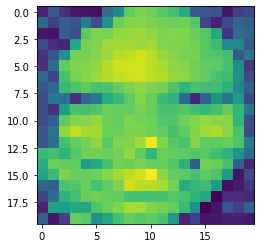

In [30]:
plt.imshow(data[0,:,:,0])